In [1]:
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2000,1,1)
end=datetime.datetime(2021,9,1)
df=web.DataReader('GOOGL','stooq',start,end)

In [2]:
def Stock_LSTM_Data_Processing(df,mem_his_days,pre_days):
  df.dropna(inplace=True)
  df.sort_index(inplace=True)

  df['label']=df['Close'].shift(-pre_days)

  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  sca_X=scaler.fit_transform(df.iloc[:,:-1])


  #import mmap
  #mem_his_days=10

  from collections import deque
  deq=deque(maxlen=mem_his_days)

  X=[]
  for i in sca_X:
    deq.append(list(i))
    if len(deq)==mem_his_days:
      X.append(list(deq))
      #print(X)

  X_lately=X[-pre_days:]
  X=X[:-pre_days]

  y=df['label'].values[mem_his_days-1:-pre_days]

  import numpy as np
  X=np.array(X)
  y=np.array(y)

  return X,y,X_lately

In [25]:
#pre_days=10
#mem_days=[5,10,15]
#lstm_layers=[1,2,3]
#dense_layers=[1,2,3]
#units=[8,16,32]

pre_days=10
mem_days=[5]
lstm_layers=[1]
dense_layers=[1]
units=[32]

from tensorflow.keras.callbacks import ModelCheckpoint

for the_mem_days in mem_days:
  for the_lstm_layers in lstm_layers:
    for the_dense_layers in dense_layers:
      for the_units in units:
        filepath='./drive/MyDrive/models/{val_mape:.2f}_{epoch:02d}_'+f'mem_{the_mem_days}_lstm_{the_lstm_layers}_dense_{the_dense_layers}_unit_{the_units}'
        checkpoint=ModelCheckpoint(
            filepath=filepath,
            save_weights_only=False,
            monitor='val_mape',
            mode='min',
            save_best_only=True
        )

        X,y,X_lately=Stock_LSTM_Data_Processing(df,the_mem_days,pre_days)
        from sklearn.model_selection import train_test_split
        X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.1)

        import tensorflow as tf
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import LSTM,Dense,Dropout
        
        model=Sequential()

        model.add(LSTM(the_units,input_shape=X.shape[1:],activation='relu',return_sequences=True))
        model.add(Dropout(0.1))
        
        for i in range(the_lstm_layers):
          model.add(LSTM(the_units,activation='relu',return_sequences=True))
          model.add(Dropout(0.1))

        model.add(LSTM(the_units,activation='relu'))
        model.add(Dropout(0.1))

        for i in range(the_dense_layers):
          model.add(Dense(the_units,activation='relu'))
          model.add(Dropout(0.1))

        model.add(Dense(1))

        model.compile(optimizer='adam',loss='mse',metrics=['mape'])

        model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[checkpoint])

Epoch 1/50
116/120 [============================>.] - ETA: 0s - loss: 246891.7969 - mape: 83.0453INFO:tensorflow:Assets written to: ./drive/MyDrive/models/87.37_01_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/87.37_01_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 13s 71ms/step - loss: 241063.4062 - mape: 81.8334 - val_loss: 4703703.5000 - val_mape: 87.3691
Epoch 2/50
119/120 [============================>.] - ETA: 0s - loss: 15402.9033 - mape: 24.3898INFO:tensorflow:Assets written to: ./drive/MyDrive/models/30.88_02_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/30.88_02_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 62ms/step - loss: 15372.2334 - mape: 24.3841 - val_loss: 718089.2500 - val_mape: 30.8801
Epoch 3/50
117/120 [============================>.] - ETA: 0s - loss: 10281.7393 - mape: 20.7402INFO:tensorflow:Assets written to: ./drive/MyDrive/models/20.38_03_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/20.38_03_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 68ms/step - loss: 10296.8672 - mape: 20.6767 - val_loss: 357119.1562 - val_mape: 20.3841
Epoch 4/50
117/120 [============================>.] - ETA: 0s - loss: 9344.5781 - mape: 19.2046INFO:tensorflow:Assets written to: ./drive/MyDrive/models/18.63_04_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/18.63_04_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 66ms/step - loss: 9309.8613 - mape: 19.1727 - val_loss: 294474.8125 - val_mape: 18.6254
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 7874.7964 - mape: 16.2989INFO:tensorflow:Assets written to: ./drive/MyDrive/models/15.82_05_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/15.82_05_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 10s 82ms/step - loss: 7874.7964 - mape: 16.2989 - val_loss: 199103.3281 - val_mape: 15.8226
Epoch 6/50
120/120 [==============================] - 1s 12ms/step - loss: 7799.4214 - mape: 14.6236 - val_loss: 216527.3750 - val_mape: 16.0123
Epoch 7/50
118/120 [============================>.] - ETA: 0s - loss: 7659.6880 - mape: 14.2746INFO:tensorflow:Assets written to: ./drive/MyDrive/models/12.68_07_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/12.68_07_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 61ms/step - loss: 7645.6699 - mape: 14.3326 - val_loss: 116914.5469 - val_mape: 12.6838
Epoch 8/50
120/120 [==============================] - 1s 12ms/step - loss: 6802.2939 - mape: 13.5900 - val_loss: 141979.1562 - val_mape: 13.1832
Epoch 9/50
116/120 [============================>.] - ETA: 0s - loss: 7561.0186 - mape: 13.5873INFO:tensorflow:Assets written to: ./drive/MyDrive/models/12.30_09_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/12.30_09_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 71ms/step - loss: 7520.6421 - mape: 13.5654 - val_loss: 122414.0391 - val_mape: 12.2990
Epoch 10/50
117/120 [============================>.] - ETA: 0s - loss: 7233.7554 - mape: 13.2049INFO:tensorflow:Assets written to: ./drive/MyDrive/models/11.97_10_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/11.97_10_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 64ms/step - loss: 7262.1743 - mape: 13.2247 - val_loss: 116343.0234 - val_mape: 11.9683
Epoch 11/50
119/120 [============================>.] - ETA: 0s - loss: 6321.4990 - mape: 12.9750INFO:tensorflow:Assets written to: ./drive/MyDrive/models/10.13_11_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/10.13_11_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 70ms/step - loss: 6315.4668 - mape: 12.9906 - val_loss: 66287.7422 - val_mape: 10.1303
Epoch 12/50
118/120 [============================>.] - ETA: 0s - loss: 6547.0488 - mape: 13.0379INFO:tensorflow:Assets written to: ./drive/MyDrive/models/9.48_12_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/9.48_12_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 60ms/step - loss: 6512.8418 - mape: 13.0273 - val_loss: 57001.2930 - val_mape: 9.4788
Epoch 13/50
117/120 [============================>.] - ETA: 0s - loss: 6503.5366 - mape: 13.0297INFO:tensorflow:Assets written to: ./drive/MyDrive/models/9.39_13_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/9.39_13_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 70ms/step - loss: 6499.6250 - mape: 13.0302 - val_loss: 58620.0742 - val_mape: 9.3941
Epoch 14/50
120/120 [==============================] - ETA: 0s - loss: 7143.8110 - mape: 13.4240INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.97_14_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.97_14_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 67ms/step - loss: 7143.8110 - mape: 13.4240 - val_loss: 51292.1211 - val_mape: 8.9717
Epoch 15/50
120/120 [==============================] - ETA: 0s - loss: 6375.3789 - mape: 12.6173INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.15_15_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.15_15_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 61ms/step - loss: 6375.3789 - mape: 12.6173 - val_loss: 32740.4805 - val_mape: 8.1516
Epoch 16/50
120/120 [==============================] - 1s 11ms/step - loss: 6087.9106 - mape: 12.3090 - val_loss: 32688.5410 - val_mape: 8.2044
Epoch 17/50
118/120 [============================>.] - ETA: 0s - loss: 7436.8423 - mape: 13.1376INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.05_17_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/8.05_17_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 12s 103ms/step - loss: 7404.9170 - mape: 13.1077 - val_loss: 25999.5332 - val_mape: 8.0545
Epoch 18/50
120/120 [==============================] - 1s 11ms/step - loss: 6352.2651 - mape: 12.5456 - val_loss: 26598.5137 - val_mape: 8.9066
Epoch 19/50
117/120 [============================>.] - ETA: 0s - loss: 7253.0679 - mape: 13.3061INFO:tensorflow:Assets written to: ./drive/MyDrive/models/7.80_19_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/7.80_19_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 58ms/step - loss: 7199.1597 - mape: 13.2738 - val_loss: 24579.4727 - val_mape: 7.8002
Epoch 20/50
118/120 [============================>.] - ETA: 0s - loss: 6257.2466 - mape: 12.2419INFO:tensorflow:Assets written to: ./drive/MyDrive/models/7.06_20_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/7.06_20_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 63ms/step - loss: 6219.4346 - mape: 12.2337 - val_loss: 24377.3262 - val_mape: 7.0641
Epoch 21/50
120/120 [==============================] - ETA: 0s - loss: 6276.9170 - mape: 12.1112INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.69_21_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.69_21_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 57ms/step - loss: 6276.9170 - mape: 12.1112 - val_loss: 18609.2246 - val_mape: 6.6884
Epoch 22/50
120/120 [==============================] - 1s 11ms/step - loss: 6122.3242 - mape: 12.3658 - val_loss: 27082.5039 - val_mape: 6.9390
Epoch 23/50
120/120 [==============================] - 1s 12ms/step - loss: 5987.5645 - mape: 11.9919 - val_loss: 23543.3984 - val_mape: 8.2095
Epoch 24/50
120/120 [==============================] - ETA: 0s - loss: 5990.0234 - mape: 11.9030INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.21_24_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.21_24_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 8s 64ms/step - loss: 5990.0234 - mape: 11.9030 - val_loss: 15270.5645 - val_mape: 6.2051
Epoch 25/50
120/120 [==============================] - 1s 10ms/step - loss: 5558.3994 - mape: 11.4373 - val_loss: 32524.3633 - val_mape: 9.7410
Epoch 26/50
119/120 [============================>.] - ETA: 0s - loss: 5874.5972 - mape: 11.5728INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.00_26_mem_5_lstm_1_dense_1_unit_32/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/models/6.00_26_mem_5_lstm_1_dense_1_unit_32/assets


120/120 [==============================] - 7s 56ms/step - loss: 5888.2852 - mape: 11.5730 - val_loss: 14417.8633 - val_mape: 5.9969
Epoch 27/50
120/120 [==============================] - 1s 12ms/step - loss: 5822.3604 - mape: 11.5360 - val_loss: 15201.4697 - val_mape: 6.2517
Epoch 28/50
120/120 [==============================] - 1s 12ms/step - loss: 5686.5215 - mape: 11.3128 - val_loss: 18562.6953 - val_mape: 6.9203
Epoch 29/50
120/120 [==============================] - 1s 12ms/step - loss: 5834.4761 - mape: 11.8380 - val_loss: 30297.0918 - val_mape: 9.3259
Epoch 30/50
120/120 [==============================] - 1s 12ms/step - loss: 5604.3359 - mape: 11.2887 - val_loss: 25768.2656 - val_mape: 8.4115
Epoch 31/50
120/120 [==============================] - 1s 12ms/step - loss: 5407.4233 - mape: 11.6191 - val_loss: 22906.2617 - val_mape: 7.6807
Epoch 32/50
120/120 [==============================] - 1s 11ms/step - loss: 5737.7549 - mape: 11.4820 - val_loss: 36196.6602 - val_mape: 10.1130
Epo

In [26]:
from tensorflow.keras.models import load_model

best_model=load_model('./models/5.13_28_mem_5_lstm_1_dense_1_unit_32')

In [27]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4864      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 32)             8320      
                                                                 
 dropout_1 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

In [28]:
best_model.evaluate(X_test,y_test)
pre= best_model.predict(X_test)
print (len(pre))

14/14 [==============================] - 1s 3ms/step - loss: 13979.0986 - mape: 5.6873
425


In [29]:
import matplotlib.pyplot as plt
print (len(y_test))

425


In [30]:
df_time=df.index[-len(y_test):]
print (df_time)

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-25',
               ...
               '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-19',
               '2021-07-20', '2021-07-21'],
              dtype='datetime64[ns]', name='Date', length=425, freq=None)


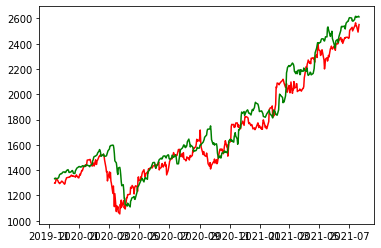

In [31]:
plt.plot(df_time,y_test,color='red',label='price')
plt.plot(df_time,pre,color='green',label='predict')
plt.show()